In [127]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

7.585185869968172e-15

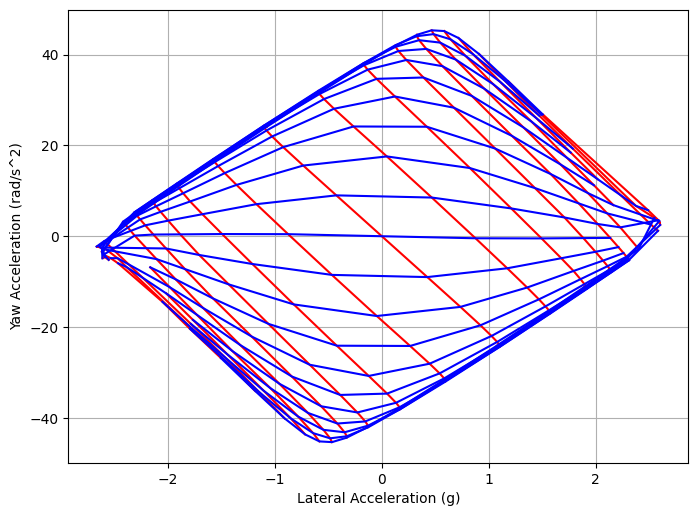

In [128]:
df = pd.read_csv("MMM.csv")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    mid_point = int(len(lat_accel)/2)

    ax.plot(lat_accel, yaw_accel, 'r')
    #ax.text(lat_accel[mid_point], yaw_accel[mid_point], '{0:.2f}'.format(x*180/math.pi))

for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        ax.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b')
ax.grid()
ax.set_ylabel("Yaw Acceleration (rad/s^2)")
ax.set_xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

In [154]:
for ii in df.columns:
    print(ii)

Unnamed: 0
ride_height
x_double_dot
y_double_dot
yaw_acceleration
roll
pitch
dynamics_tires_saturated
dynamics_two_tires_lifting
dynamics_total_inclination_angle_percent_loss
dynamics_total_inclination_angle_force_loss
dynamics_front_tube_forces
dynamics_rear_tube_forces
front_left_tire_unsprung_displacement
front_left_tire_tire_centric_forces_0
front_left_tire_tire_centric_forces_1
front_left_tire_tire_centric_forces_2
front_left_tire_velocity_0
front_left_tire_velocity_1
front_left_tire_velocity_2
front_left_tire_slip_angle
front_left_tire_inclination_angle
front_left_tire_vehicle_centric_forces_0
front_left_tire_vehicle_centric_forces_1
front_left_tire_vehicle_centric_forces_2
front_left_tire_moments_0
front_left_tire_moments_1
front_left_tire_moments_2
front_left_tire_steering_inclination
front_left_tire_z_c
front_left_tire_f_roll
front_left_tire_f_heave
front_left_tire_inclination_angle_percent_loss
front_left_tire_inclination_angle_force_loss
front_left_tire_tube_force_FUCA
front

In [147]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['front_left_tire_tube_force_{}'.format(tube)].max() / 4.448)

264.5031930583853
126.39269893058793
254.15087412458197
731.4643552756922
329.78363675757976
0.0


In [151]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['front_right_tire_tube_force_{}'.format(tube)].max() / 4.448)

571.1914205019762
173.14869829359375
189.68986852353783
253.39280978946928
321.41179387405845
0.0


In [148]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['rear_left_tire_tube_force_{}'.format(tube)].max() / 4.448)

1220.1382970702582
232.00310077430146
616.2066440882483
1559.0752575312292
-0.5679307362209244
-0.039918768303930506


In [150]:
for tube in ['FUCA', 'RUCA', 'FLCA', 'RLCA', 'p_rod', 'toe_link']:
    print(df['rear_right_tire_tube_force_{}'.format(tube)].max() / 4.448)

1923.0144745784712
506.22060727579697
340.99676657670614
441.24519676139363
-0.1865779714117689
-0.1008567222858862


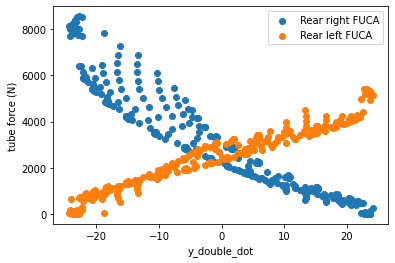

In [172]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_FUCA'], label='Rear right FUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_FUCA'], label='Rear left FUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()

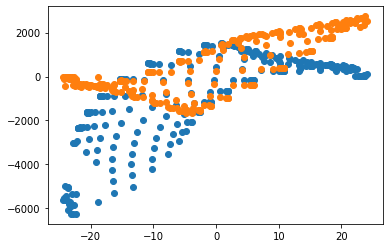

In [165]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_FLCA'])
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_FLCA'])
plt.show()

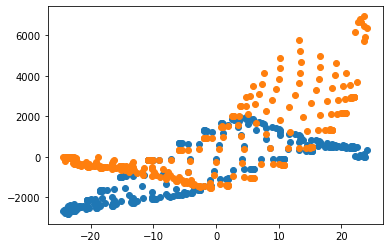

In [166]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_RLCA'])
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_RLCA'])
plt.show()

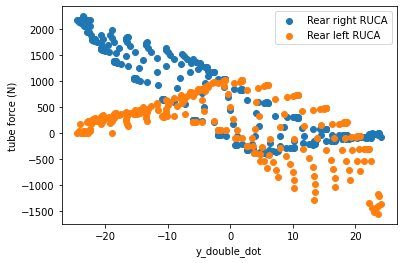

In [171]:
fig = plt.figure()
plt.scatter(df['y_double_dot'], df['rear_right_tire_tube_force_RUCA'], label='Rear right RUCA')
plt.scatter(df['y_double_dot'], df['rear_left_tire_tube_force_RUCA'], label='Rear left RUCA')
plt.xlabel('y_double_dot')
plt.ylabel('tube force (N)')
plt.legend()
plt.show()